## SVD

**SVD** Singular Value Decomposition is a factorization of a matrix that generalizes **Eigen Value Decomposition** of square matrices. It also helps find what is called a **Pseudo Inverse**. In the sheet below application of **SVD** and intuition behind **SVD** is demonstrated.

For a matrix **X** **SVD** is defined as:
\begin{equation}\label{eq:}
X=U \Sigma V^T
\end{equation}

Where **U** is a orthognal Matrix. **$\Sigma$** is a diagonal matrix, and **V** is also an orthognal matrix.

In [1]:
import numpy as np

In [2]:
X=np.array([[4,4],[-3,3]])
X

array([[ 4,  4],
       [-3,  3]])

In [3]:
(u, s, vh) = np.linalg.svd(X)
print(f"U={u}")
print(f"s={s}")
print(f"v={vh}")

U=[[-1.00000000e+00 -3.70074342e-18]
 [ 3.70074342e-18  1.00000000e+00]]
s=[5.65685425 4.24264069]
v=[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


**U** and **V** are orthognal matrices
that means

$U^TU=I$ and $V^TV=I$. Lets check that below 

In [4]:
print(f"u*u.T={u@u.T}")
print(f"v*v.T={vh@vh.T}")

u*u.T=[[ 1.00000000e+00 -7.40148683e-18]
 [-7.40148683e-18  1.00000000e+00]]
v*v.T=[[ 1.00000000e+00 -2.23711432e-17]
 [-2.23711432e-17  1.00000000e+00]]


Singular values of X are sqrt of Eigen values of $X^T X$.

$X = U \Sigma V^T$.

Lets Compute $X^TX=V \Sigma^T U^T U \Sigma V^T$

We know $U^T U = I$

$X^TX=V \Sigma^T \Sigma V^T$

Since $X$ is symmetric matrix $\Sigma^T \Sigma$ has its Eigen values, and $\Sigma$ has sqrt of Eigen values of $X^T X$. $V$ has Eigen vectors of $X^TX$. Lets check that below.

In [5]:
(w,v) = np.linalg.eig(X.T@X)
print(f"w={np.sqrt(w)}")
print(f"v={v}")

w=[5.65685425 4.24264069]
v=[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


Another thing which **SVD** gives us is **Pseudo Inverse**

**Left Pseudo Inverse** $A^\dagger = V \Sigma^{-1} U^T$

In [6]:
Xp = np.linalg.pinv(X)
print(f"X Psuedo Inv = {Xp}")

X Psuedo Inv = [[ 0.125      -0.16666667]
 [ 0.125       0.16666667]]


Lets compute the same with **SVD**.

In [7]:
Xp = vh.T@np.diag(1.0/s)@u
Xp

array([[ 0.125     , -0.16666667],
       [ 0.125     ,  0.16666667]])

**SVD** by both methdos match! Also note that for a square full rank matrix inverse and psuedo inverse are equal.

In [8]:
Xp = np.linalg.inv(X)
Xp

array([[ 0.125     , -0.16666667],
       [ 0.125     ,  0.16666667]])

To see the real magic of SVD lets look at pseudo inverse of rank deficient matrics and square matrices.

In [9]:
X = np.array([[4,4],[3,3]])
X

array([[4, 4],
       [3, 3]])

X is a Rank 1 matrix. We can't take an inverse of this, but we can take a **Pseudo Inverse** of this. Lets see that.

In [10]:
Xp = np.linalg.pinv(X)
Xp

array([[0.08, 0.06],
       [0.08, 0.06]])

Now lets take a **Pseudo Inverse** of rectangular matrices

In [11]:
X = np.array([[4,4],[3,-3],[2,1]])
X

array([[ 4,  4],
       [ 3, -3],
       [ 2,  1]])

In [12]:
Xp = np.linalg.pinv(X)
Xp

array([[ 0.10104012,  0.15601783,  0.06389302],
       [ 0.11887073, -0.16939079,  0.01634473]])

**Pseudo Inverse** does behave like an inverse
$X^\dagger X=I$

In [13]:
R = Xp@X
R

array([[ 1.00000000e+00,  1.52655666e-16],
       [-1.87350135e-16,  1.00000000e+00]])

Now lets find **Pseudo Inverse** of a wide matrix

In [14]:
X = np.array([[4,4,4],[3,-3,2]])
Xp = np.linalg.pinv(X)
Xp

array([[ 0.06451613,  0.11290323],
       [ 0.11290323, -0.17741935],
       [ 0.07258065,  0.06451613]])

### SVD for compression

Size of image=197.65kb


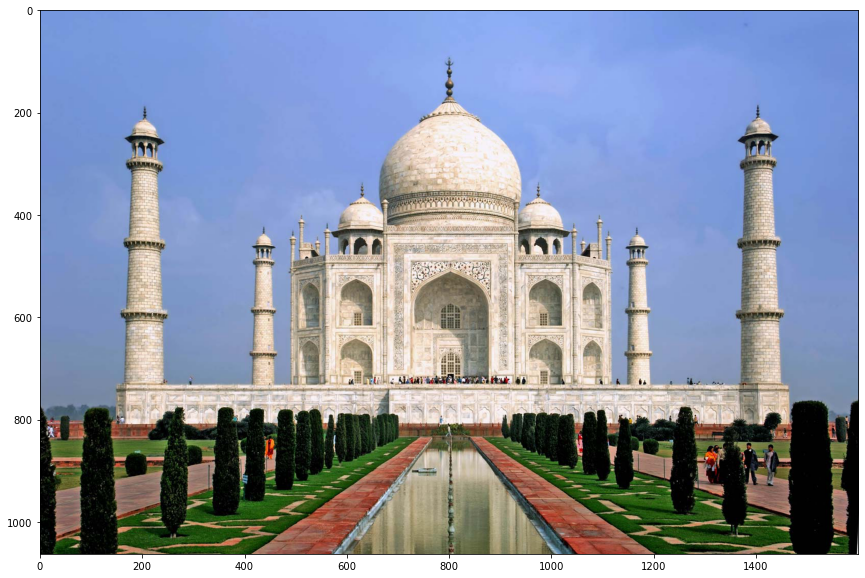

In [20]:
from PIL import Image
import matplotlib.pyplot as plt
import os

path = 'test.jpg'
img = Image.open(path)
s = float(os.path.getsize(path))/1024
print(f"Size of image={s:0.2f}kb")
plt.figure(figsize=(20,10))
plt.imshow(img)

Lets convert the image to grey scale. Its much easier to compress grey scale images using SVD, hence for this example we will do that.

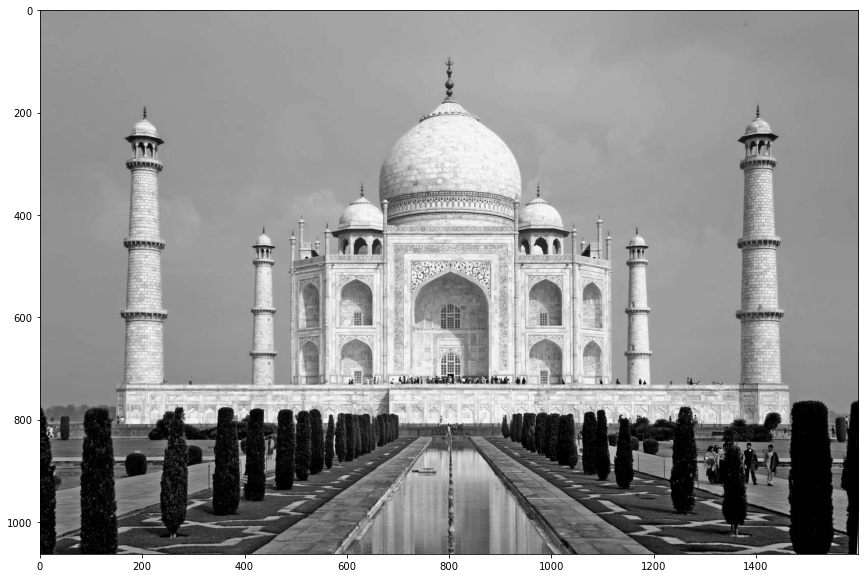

In [21]:
imggray = img.convert('LA')
imgmat = np.array( list(imggray.getdata(band = 0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(20,10))
plt.imshow(imgmat, cmap = 'gray')

In [25]:
def SVD(n, imgmat):
    U, S, Vh = np.linalg.svd(imgmat)
    img_new = np.matrix(U[:,:n]) @ np.diag(S[:n]) @  np.matrix(Vh[:n,:])
    plt.figure(figsize=(20,10))
    plt.imshow(img_new, cmap='gray')
    plt.title(f'Number of singular values {n}')

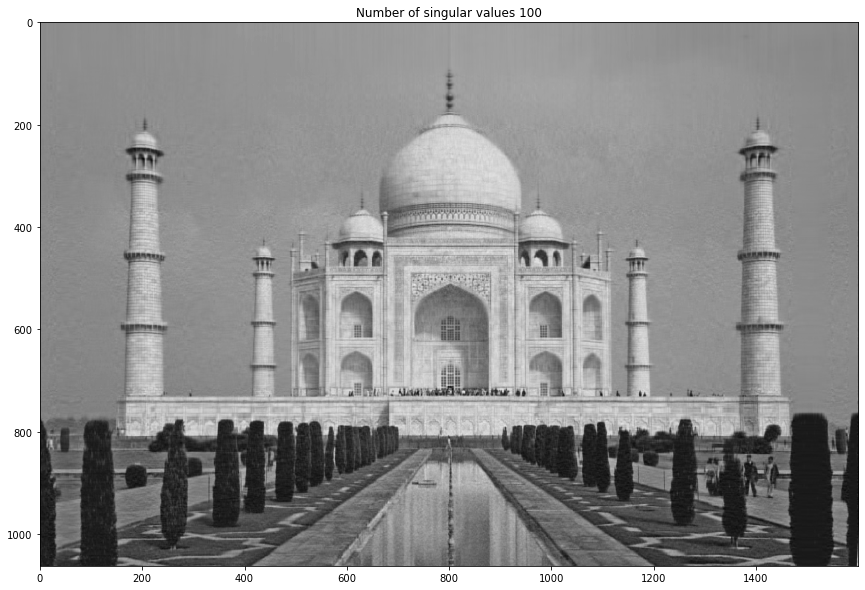

In [26]:
SVD(100, imgmat)

In [27]:
from ipywidgets import interact,fixed
import ipywidgets as widgets
interact(SVD, 
         n=widgets.IntSlider(min=1, max=1000, step=1, value=50, continuous_update=False), 
         imgmat=fixed(imgmat))

interactive(children=(IntSlider(value=50, continuous_update=False, description='n', max=1000, min=1), Output()…

<function __main__.SVD(n, imgmat)>